# Продвинутая визуализация с matplotlib

## Урок 3. Несколько графиков на одном полотне

В этом уроке мы научимся изображать несколько графиков на одном полотне.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Разбор практического задания

In [ ]:
df = pd.read_csv('wage-data-coast.csv')
df

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1
...,...,...,...,...
2745,2017,Virginia,7.25000,1
2746,2017,Washington,11.00000,1
2747,2017,West Virginia,8.75000,0
2748,2017,Wisconsin,7.25000,0


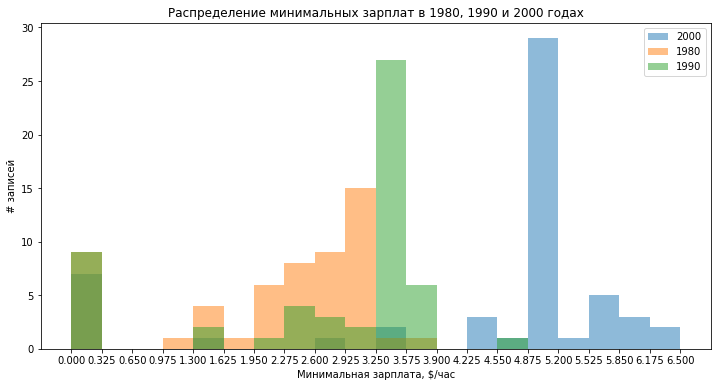

In [ ]:
data = df[df['Year'] == 1980]['Salary']
data1 = df[df['Year'] == 1990]['Salary']
data2 = df[df['Year'] == 2000]['Salary']


fig, ax = plt.subplots(figsize=(12,6))
_, bins, _ = ax.hist(data2, label='2000', alpha=0.5, bins=20)
ax.hist(data, label='1980', alpha=0.5, bins=bins)
ax.hist(data1, label='1990', alpha=0.5, bins=bins)


ax.set_title('Распределение минимальных зарплат в 1980, 1990 и 2000 годах')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')
ax.set_xticks(bins)
ax.legend()

plt.show()

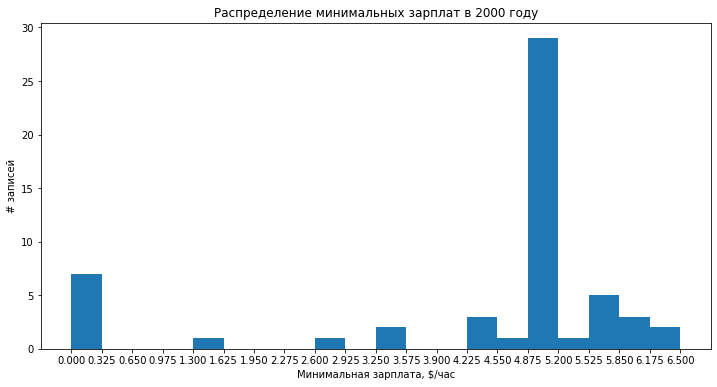

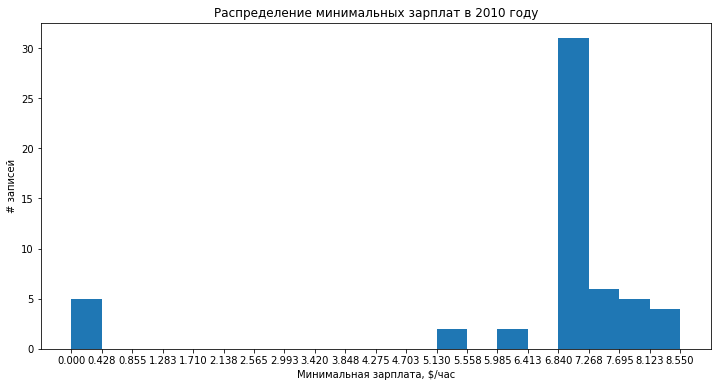

In [ ]:
for year in [2000, 2010]:
    data = df[df['Year'] == year]['Salary']


    fig, ax = plt.subplots(figsize=(12,6))
    _, bins, _ = ax.hist(data, label=str(year), bins=20)

    ax.set_title('Распределение минимальных зарплат в ' + str(year) + ' году')
    ax.set_xlabel('Минимальная зарплата, $/час')
    ax.set_ylabel('# записей')
    ax.set_xticks(list(bins))

### Вывод нескольких графиков на одном полотне

#### **Добавление нескольких axs**

Для того, чтобы на холст добавить несколько графиков, нужно немного изменить инициализацию графика. Функция `plt.subplots()` принимает 2 необязательных аргумента **nrows** и **ncols** - это настройка сетки графиков на холсте.  Два графика друг под другом можно представить как сетку из двух строк и одного столбца. В каждой ячейке такой сетки будет располагаться отдельный график.

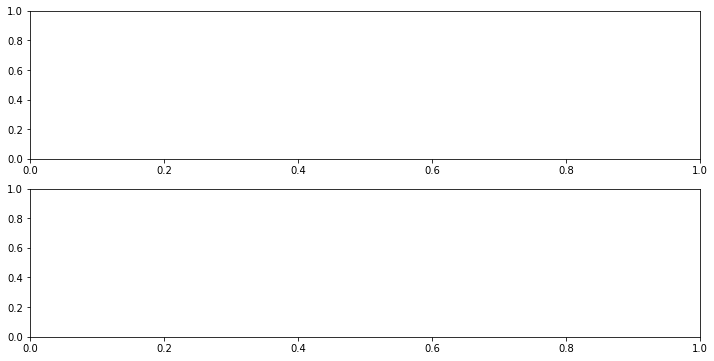

In [ ]:
fig, axs = plt.subplots(figsize = (12,6), ncols = 1, nrows = 2)

Мы видим 2 пустых графика на одном холсте. Давайте добавим к этим графикам данные. 

Сначала создаем массивы зарплат 2000 и 2010 год. Теперь нужно добавить эти данные на графики. Давайте гистограмму за 2000 год построим на верхнем графике, а за 2010 год - на нижнем. Верхнему графику соответствует нулевой элемент массива. Вызовем у него метод `hist` и передадим массив данных. То же самое проделаем и для второго графика.


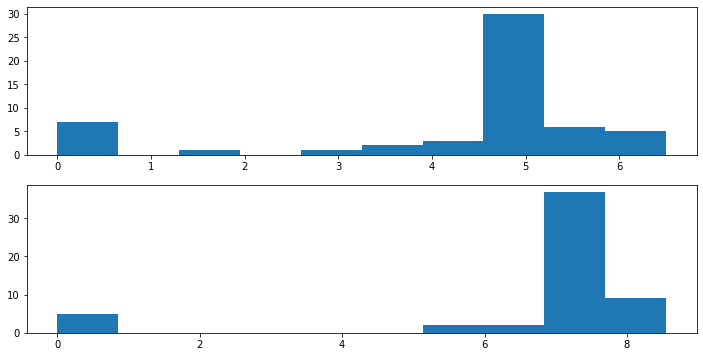

In [ ]:
fig, axs = plt.subplots(figsize = (12,6), ncols = 1, nrows = 2)

data = df[df['Year'] == 2000]['Salary']
data1 = df[df['Year'] == 2010]['Salary']

axs[0].hist(data)
axs[1].hist(data1)

plt.show()

Гистограммы отображаются. Но мы видим, что оси Ох опять не совпадают. Для того, чтобы привести их к одинаковой шкале, в вызов функции `subplots()` добавим параметр **sharex**, т.е. разделять ось Ох между графиками. Присвоим параметру значение true.

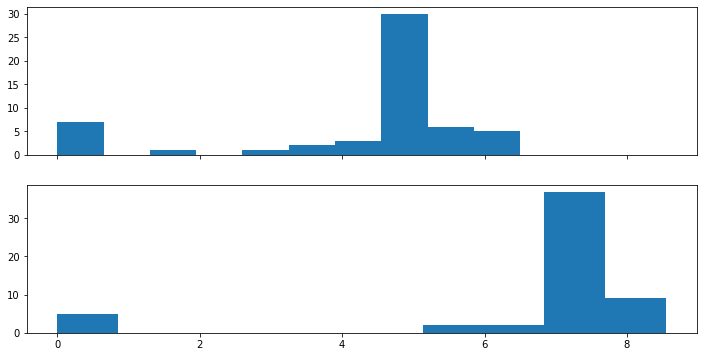

In [ ]:
fig, axs = plt.subplots(figsize = (12,6), ncols = 1, nrows = 2, sharex = True)

axs[0].hist(data)
axs[1].hist(data1)

plt.show()

Теперь оси приведены к одному масштабу, и мы можем удобно сопоставлять гистограммы. Давайте еще поменяет отсечки на графиках. Для этого сначала приведем столбцы к одинаковой ширине, мы это уже умеем делать. Сначала выводим самую широкую гистограмму, сохраняем ее отсечки, и передаем их в метод `hist()` второй гистограммы. Теперь нужно передать отсечки в метод `set_xticks()`. Только теперь это нужно сделать для каждого графика, т.е. для каждого элемента массива axs.

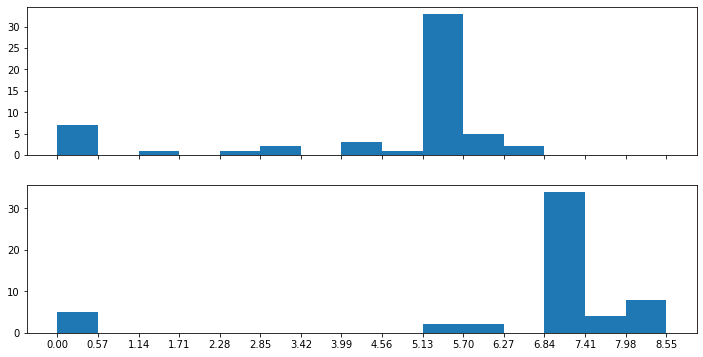

In [ ]:
fig, axs = plt.subplots(figsize = (12,6), ncols = 1, nrows = 2, sharex = True)

_, bins1, _ = axs[1].hist(data1, bins = 15)
axs[0].hist(data, bins = bins1)

axs[0].set_xticks(bins1)
axs[1].set_xticks(bins1)

plt.show()

Готово, получили то, что нужно. Не забываем про заголовки графиков и подписи осей, давайте их добавим.

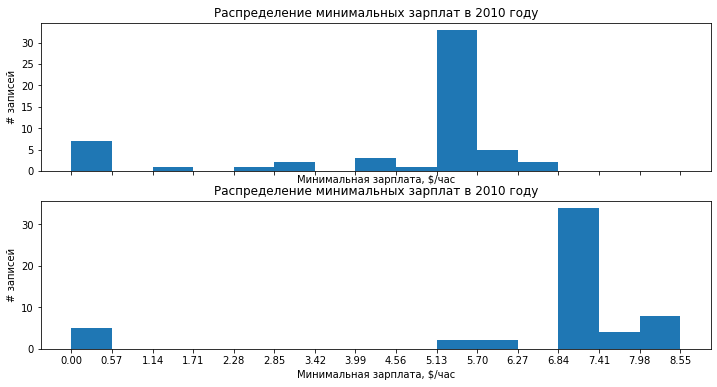

In [ ]:
fig, axs = plt.subplots(figsize = (12,6), ncols = 1, nrows = 2, sharex = True)

_, bins1, _ = axs[1].hist(data1, bins = 15)
axs[0].hist(data, bins = bins1)

axs[0].set_xticks(bins1)
axs[1].set_xticks(bins1)

axs[0].set_title('Распределение минимальных зарплат в ' + str(year) + ' году')
axs[0].set_xlabel('Минимальная зарплата, $/час')
axs[0].set_ylabel('# записей')

axs[1].set_title('Распределение минимальных зарплат в ' + str(year) + ' году')
axs[1].set_xlabel('Минимальная зарплата, $/час')
axs[1].set_ylabel('# записей')

plt.show()

Кажется, что подпись оси Ох верхнего графика графика здесь лишняя.  Давайте ее уберем. Еще на обоих графиках давайте проведем тонкие вертикальные линии у каждой отсечки, чтобы глазами было проще отследить отсечки верхнего графика до их меток на нижнем графике. Мы уже умеем добавлять вертикальные линии с помощью метода `axvline`, используем его и здесь. Итерируем по всем отсечкам и по всем графикам. Добавляем линию, делаем ее светло-серой и толщиной в 1 пиксель.

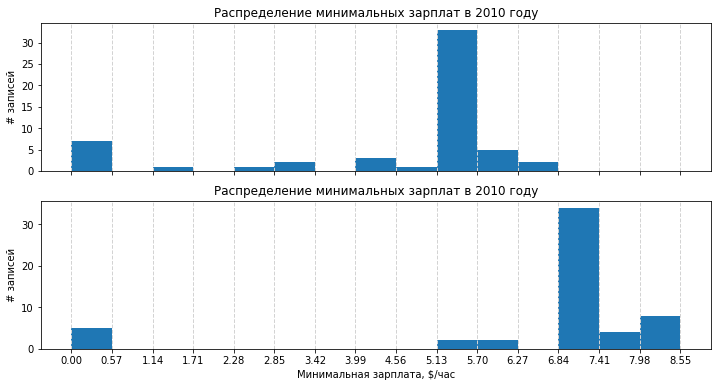

In [ ]:
fig, axs = plt.subplots(figsize = (12,6), ncols = 1, nrows = 2, sharex = True)

_, bins1, _ = axs[1].hist(data1, bins = 15)
axs[0].hist(data, bins = bins1)

axs[0].set_xticks(bins1)
axs[1].set_xticks(bins1)

axs[0].set_title('Распределение минимальных зарплат в ' + str(year) + ' году')
axs[0].set_ylabel('# записей')

axs[1].set_title('Распределение минимальных зарплат в ' + str(year) + ' году')
axs[1].set_xlabel('Минимальная зарплата, $/час')
axs[1].set_ylabel('# записей')

for bin_ in list(bins1):
  for ax in axs:
    ax.axvline(x = bin_, color = 'lightgrey', linewidth = 1, linestyle = '--')

plt.show()

Часто подход с нанесением нескольких графиков на один холст применяют, когда нужно вывести много однотипных графиков и посмотреть на картину в целом. Например, мы хотим посмотреть, каким было распределение минимальных зарплат в 1980, 1990, 2000 и 2010 годах. При этом по каждому из этих годов мы хотим видеть отдельные гистограммы для прибрежных и внутренних штатов. Таким образом, всего мы получим 8 гистограмм, и мы можем их также нанести на один холст в виде сетки из 4 строк и 2 столбцов. В этой сетке строками будут года, столбцами - признак, прибрежный штат или внутренний. В ячейках сетки будут находиться гистограммы распределения минимальных зарплат в конкретный год в прибрежных либо внутренних штатах. Что ж, давайте построим такую визуализацию. 

Для начала инициализируем график. Мы хотим построить сетку из 4 строк и 2 столбцов. На этот раз давайте не будем делать ось Ох одинаковой для всех графиков, а сделаем общей ось Оу.


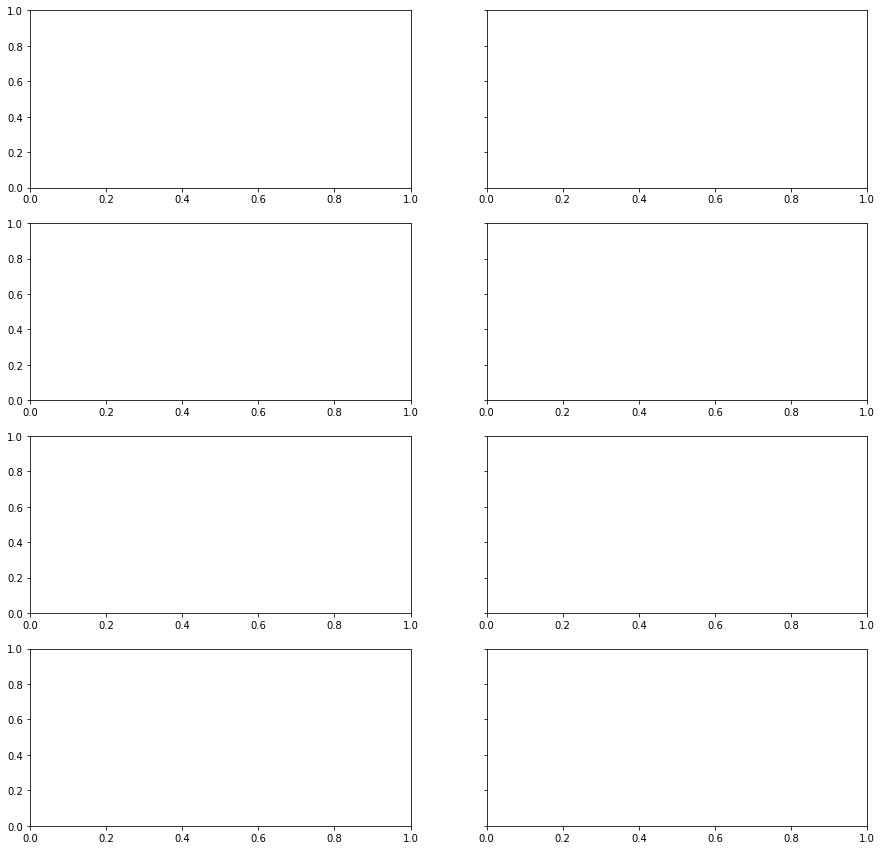

In [ ]:
fig, axs = plt.subplots(figsize = (15,15), ncols = 2, nrows = 4, sharey = True)

Получили сетку из 4 строк и 2 столбцов, как и ожидали. Давайте еще подробнее посмотрим на массив **axs**, чтобы узнать, как расположены объекты графиков внутри этого массива.

In [ ]:
axs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4dce31e790>,
      dtype=object)

Видим, что axs представляет собой двумерный массив, и расположение объектов графиков в нем соответствует расположению графиков на сетке. Т.е. если мы хотим работать с верхним левым графиком, то мы обращаемся к объекту нулевой строки и нулевого столбца массива. Все просто и логично.

Итак, давайте теперь добавим на график данные. Для начала заведем 2 списка, с годами и значениями **IsCoastal**, по которым мы будем итерировать. Будем перебирать эти списки в цикле. Каждую итерацию выбираем соответствующие данные из датафрейма и добавляем их на соответствующий график в массиве. В конце не забываем `plt.show()`.


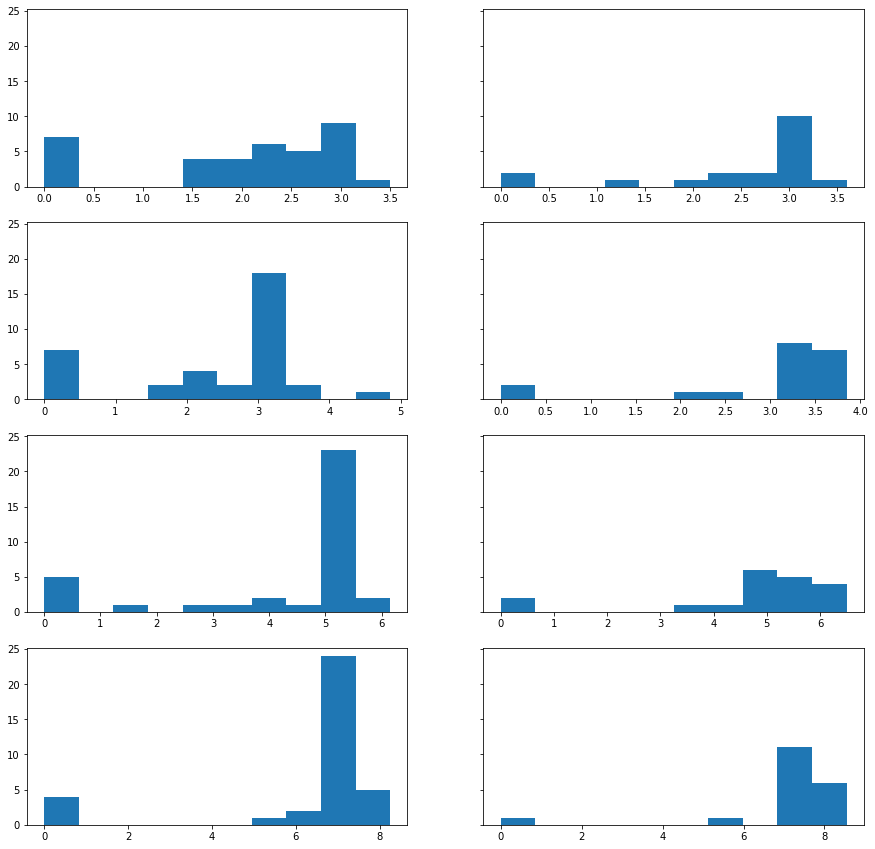

In [ ]:
fig, axs = plt.subplots(figsize = (15,15), ncols = 2, nrows = 4, sharey = True)

years = [1980, 1990, 2000, 2010]
is_coastal = [0,1]

for i, _ in enumerate(years):
  for j, _ in enumerate(is_coastal):
    data = df[(df['Year'] == years[i]) & (df['IsCoastal'] == is_coastal[j])]['Salary']
    axs[i][j].hist(data)

plt.show()

Данные на графики добавлены, осталось подписать оси и добавить заголовки. Давайте начнем с подписей осей. 

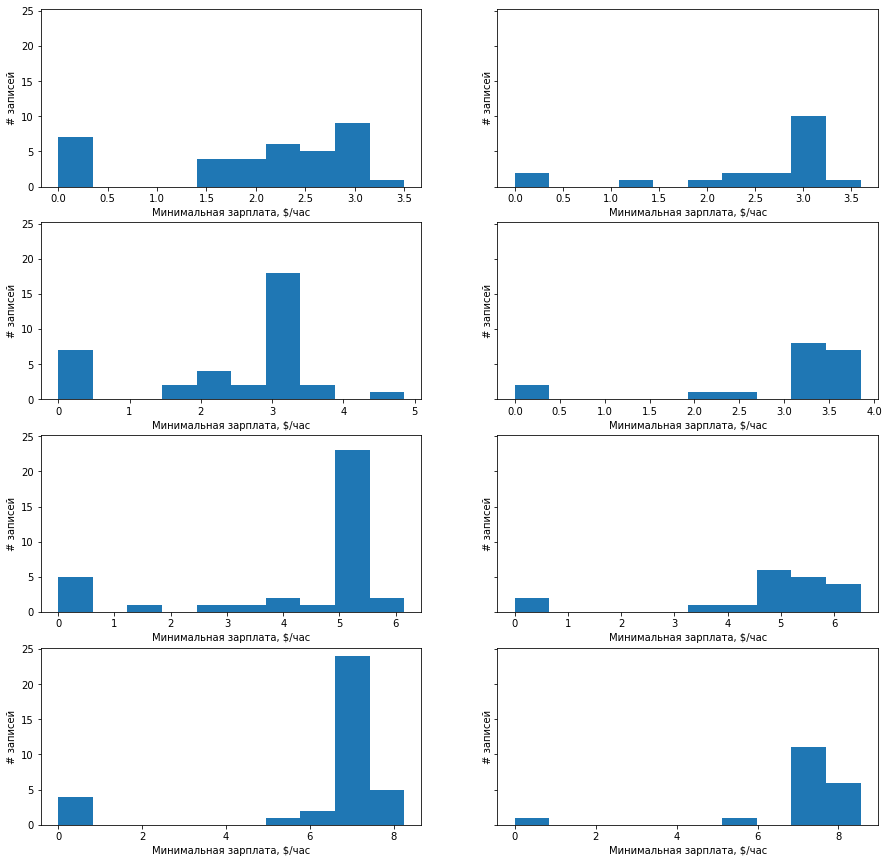

In [ ]:
fig, axs = plt.subplots(figsize = (15,15), ncols = 2, nrows = 4, sharey = True)

years = [1980, 1990, 2000, 2010]
is_coastal = [0,1]

for i, _ in enumerate(years):
  for j, _ in enumerate(is_coastal):
    data = df[(df['Year'] == years[i]) & (df['IsCoastal'] == is_coastal[j])]['Salary']
    ax = axs[i][j]
    ax.hist(data)
    ax.set_xlabel('Минимальная зарплата, $/час')
    ax.set_ylabel('# записей')

plt.show()

На верхних графиках подписи горизонтальной оси не очень красиво накладываются на нижние графики. Давайте оставим подписи осей только на нижнем ряду графиков. И также мы их немного изменим, чтобы явно показать, что левая колонка с графиками - это прибрежные штаты, а правые - внутренние.

И аналогичным образом подпишем вертикальные оси, чтобы показать, что первый ряд - данные за 1980 год, второй - за 1990 и т.д.
Осталось добавить заголовок. Давайте не будем подписывать каждый график отдельно, а подпишем весь холст. Холст мы изменяем через объект **fig**, у которого есть метод `suptitle`.


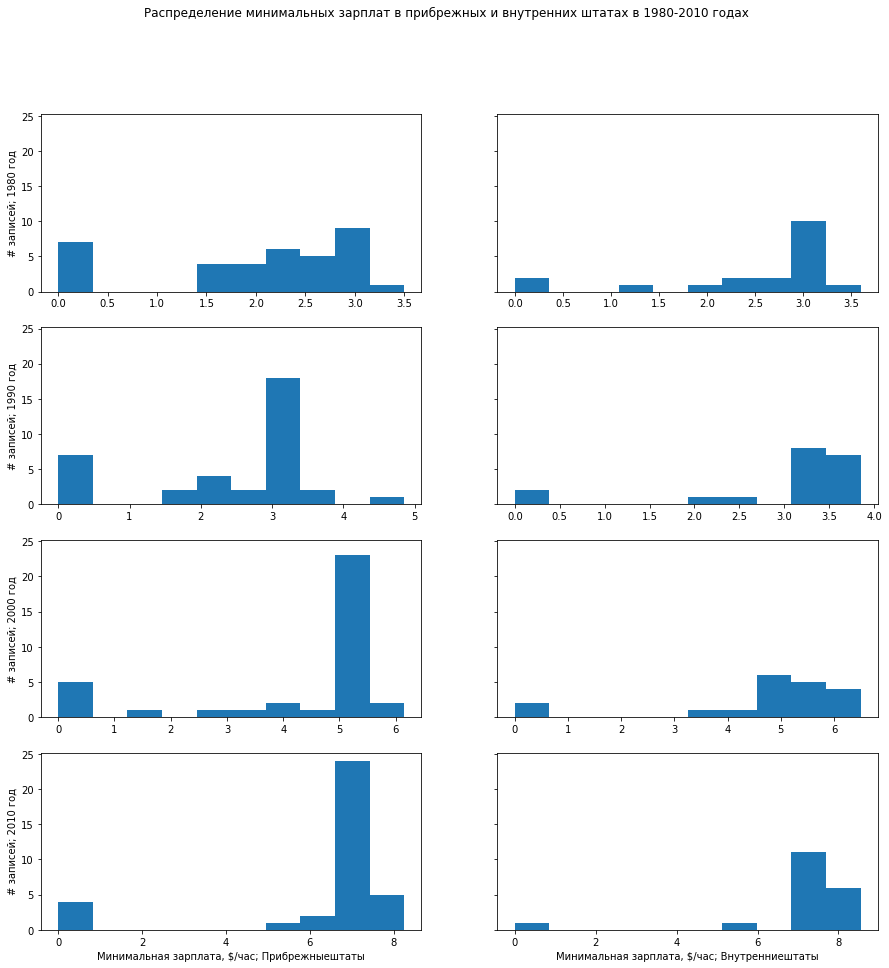

In [ ]:
fig, axs = plt.subplots(figsize = (15,15), ncols = 2, nrows = 4, sharey = True)

years = [1980, 1990, 2000, 2010]
is_coastal = [0,1]

for i, _ in enumerate(years):
  for j, _ in enumerate(is_coastal):
    data = df[(df['Year'] == years[i]) & (df['IsCoastal'] == is_coastal[j])]['Salary']
    ax = axs[i][j]
    ax.hist(data)

    if i == len(years) - 1:
      states_type = 'Прибрежные' if is_coastal[j] == 0 else 'Внутренние'
      ax.set_xlabel('Минимальная зарплата, $/час; ' + states_type + 'штаты')

    if j == 0:
      ax.set_ylabel('# записей; ' + str(years[i]) + ' год')

fig.suptitle('Распределение минимальных зарплат в прибрежных и внутренних штатах в 1980-2010 годах')

plt.show()

Заголовок добавлен, но отступ от графиков достаточно большой. У метода `suptitle()` есть  2 параметра, x и y, которые отвечают за расположение заголовка на холсте. Мы хотим уменьшить расстояние по вертикали, поэтому нам нужен параметр y. По умолчанию он равен 0.98, давайте немного уменьшим его и посмотрим на результат.


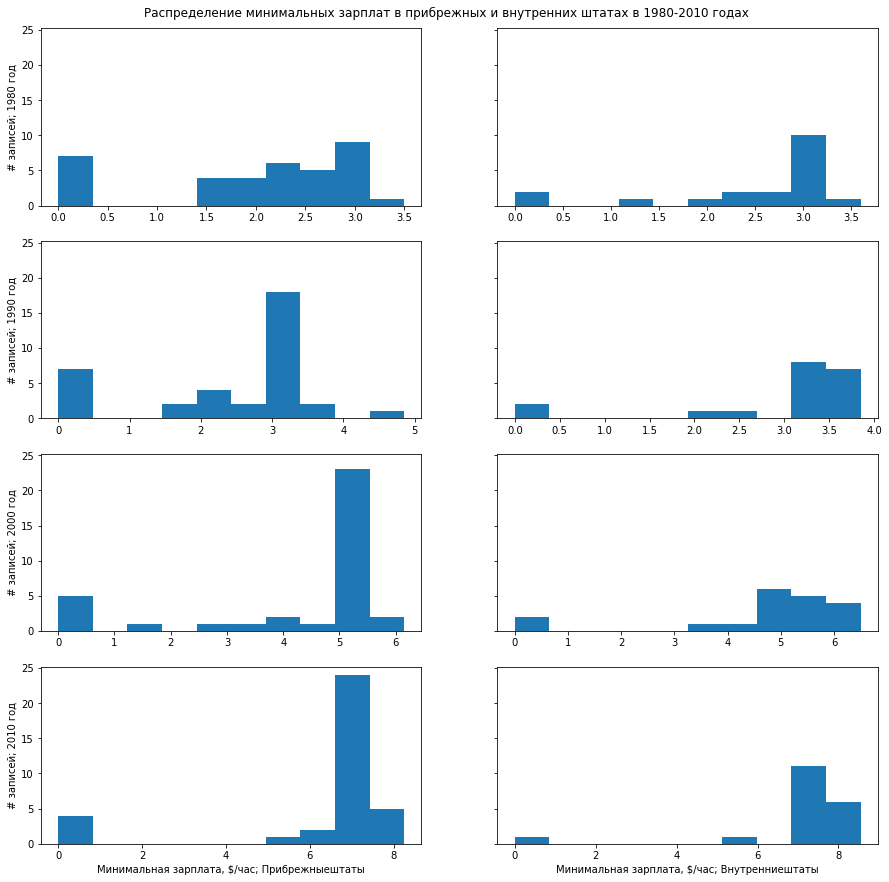

In [ ]:
fig, axs = plt.subplots(figsize = (15,15), ncols = 2, nrows = 4, sharey = True)

years = [1980, 1990, 2000, 2010]
is_coastal = [0,1]

for i, _ in enumerate(years):
  for j, _ in enumerate(is_coastal):
    data = df[(df['Year'] == years[i]) & (df['IsCoastal'] == is_coastal[j])]['Salary']
    ax = axs[i][j]
    ax.hist(data)

    if i == len(years) - 1:
      states_type = 'Прибрежные' if is_coastal[j] == 0 else 'Внутренние'
      ax.set_xlabel('Минимальная зарплата, $/час; ' + states_type + 'штаты')

    if j == 0:
      ax.set_ylabel('# записей; ' + str(years[i]) + ' год')

fig.suptitle('Распределение минимальных зарплат в прибрежных и внутренних штатах в 1980-2010 годах', y = 0.90)

plt.show()